<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>
<li>EDA</li>
<li>Visualizations</li>
</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

In [ ]:
import pandas as pd
import missingno as msngo
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Healthcare Providers.csv")
df.head()

index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                            NaN                          MD   
4                              E                          DO   

  Gender of the Provider Entity Type of the Provider  \
0                      F                           I   
1                      F                           I   
2                      M                           I   
3                      M                           I   
4                      M                           I   

  Street Address 1 of the Provider Street Address 2 of the Provider  ...  \
0                1402 S GRAND BLVD                   FDT 14TH FLOOR  ...   
1                  2950 VILLAGE DR                              NaN  ...   
2                20 WASHINGTON AVE                          STE 212  ...   
3               5746 N BROADWAY ST                              NaN  ...   
4                 875 MILITARY TRL                        SUITE 200  ...   

  HCPCS Code                                  HCPCS Description  \
0      99223  Initial hospital inpatient care, typically 70 ...   
1      G0202  Screening mammography, bilateral (2-view study...   
2      99348  Established patient home visit, typically 25 m...   
3      81002                            Urinalysis, manual test   
4      96372  Injection beneath the skin or into muscle for ...   

  HCPCS Drug Indicator Number of Services Number of Medicare Beneficiaries  \
0                    N                 27                               24   
1                    N                175                              175   
2                    N                 32                               13   
3                    N                 20                               18   
4                    N                 33                               24   

  Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27         
1                                                175         
2                                                 32         
3                                                 20         
4                                                 31         

  Average Medicare Allowed Amount Average Submitted Charge Amount  \
0                    200.58777778                    305.21111111   
1                          123.73                           548.8   
2                           90.65                             155   
3                             3.5                               5   
4                           26.52                              40   

  Average Medicare Payment Amount Average Medicare Standardized Amount  
0                    157.26222222                         160.90888889  
1                          118.83                         135.31525714  
2                      64.4396875                           60.5959375  
3                            3.43                                 3.43  
4                    19.539393939                         19.057575758  

[5 ro

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [ ]:
df['Average Medicare Payment Amount'] = df['Average Medicare Payment Amount'].transform(lambda x: x.replace(',','')).astype('float')
df['Number of Services'] = df['Number of Services'].transform(lambda x: x.replace(',','')).astype('float')
df['Number of Medicare Beneficiaries'] = df['Number of Medicare Beneficiaries'].transform(lambda x: x.replace(',','')).astype('float')
df['Number of Distinct Medicare Beneficiary/Per Day Services'] = df['Number of Distinct Medicare Beneficiary/Per Day Services'].transform(lambda x: x.replace(',','')).astype('float')
df['Average Medicare Allowed Amount'] = df['Average Medicare Allowed Amount'].transform(lambda x: x.replace(',','')).astype('float')
df['Average Submitted Charge Amount'] = df['Average Submitted Charge Amount'].transform(lambda x: x.replace(',','')).astype('float')
df['Average Medicare Standardized Amount'] = df['Average Medicare Standardized Amount'].transform(lambda x: x.replace(',','')).astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



Average Medicare Payment Amount - the amount the provider has paid for services

Visualize the target column

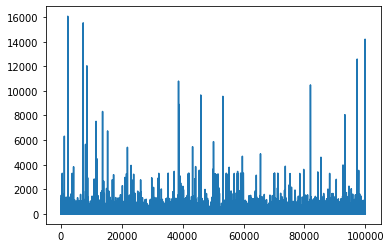

In [ ]:
df['Average Medicare Payment Amount'].plot()

# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [ ]:
df.isnull().sum() / len(df) * 100

index                                                        0.000
National Provider Identifier                                 0.000
Last Name/Organization Name of the Provider                  0.000
First Name of the Provider                                   4.255
Middle Initial of the Provider                              29.331
Credentials of the Provider                                  7.209
Gender of the Provider                                       4.254
Entity Type of the Provider                                  0.000
Street Address 1 of the Provider                             0.000
Street Address 2 of the Provider                            59.363
City of the Provider                                         0.000
Zip Code of the Provider                                     0.000
State Code of the Provider                                   0.000
Country Code of the Provider                                 0.000
Provider Type                                                0

Visualize the missing values using Missingno library

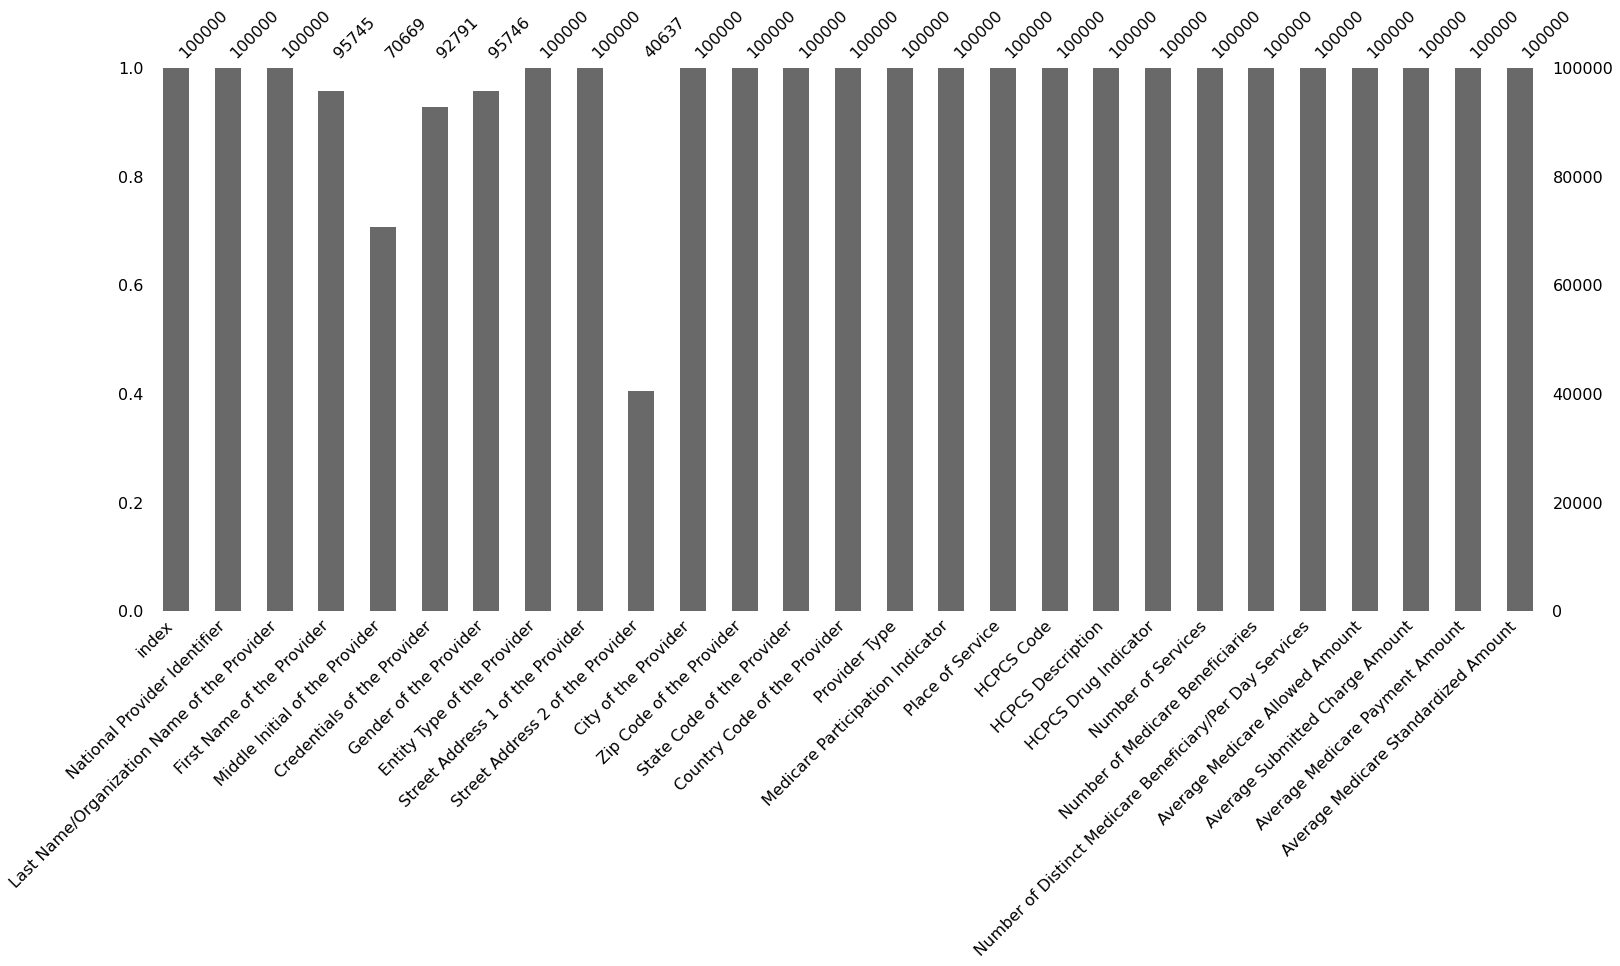

In [ ]:
msngo.bar(df)

## <font color = 'Orange'> Find reasons for the missing values</font> 


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

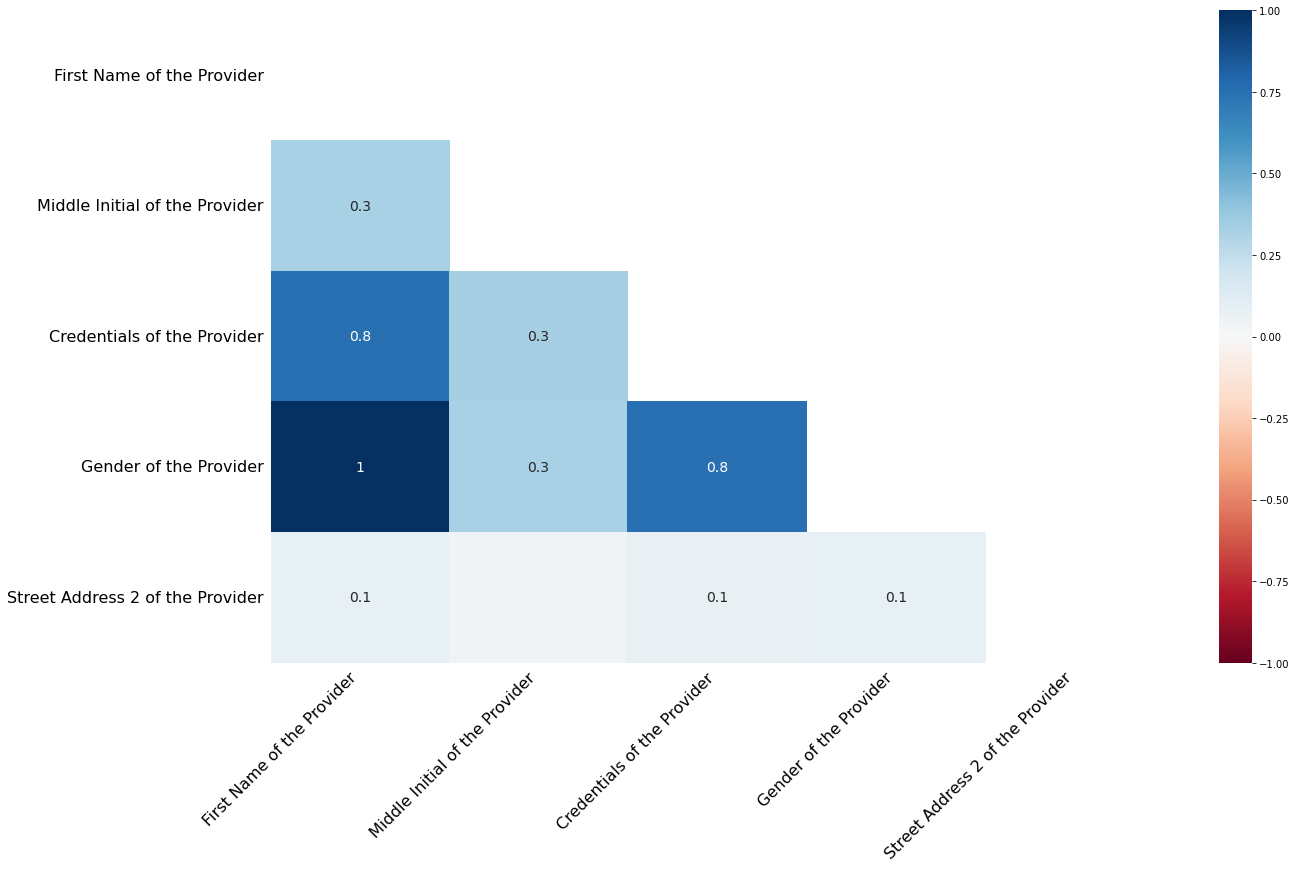

In [ ]:
msngo.heatmap(df)

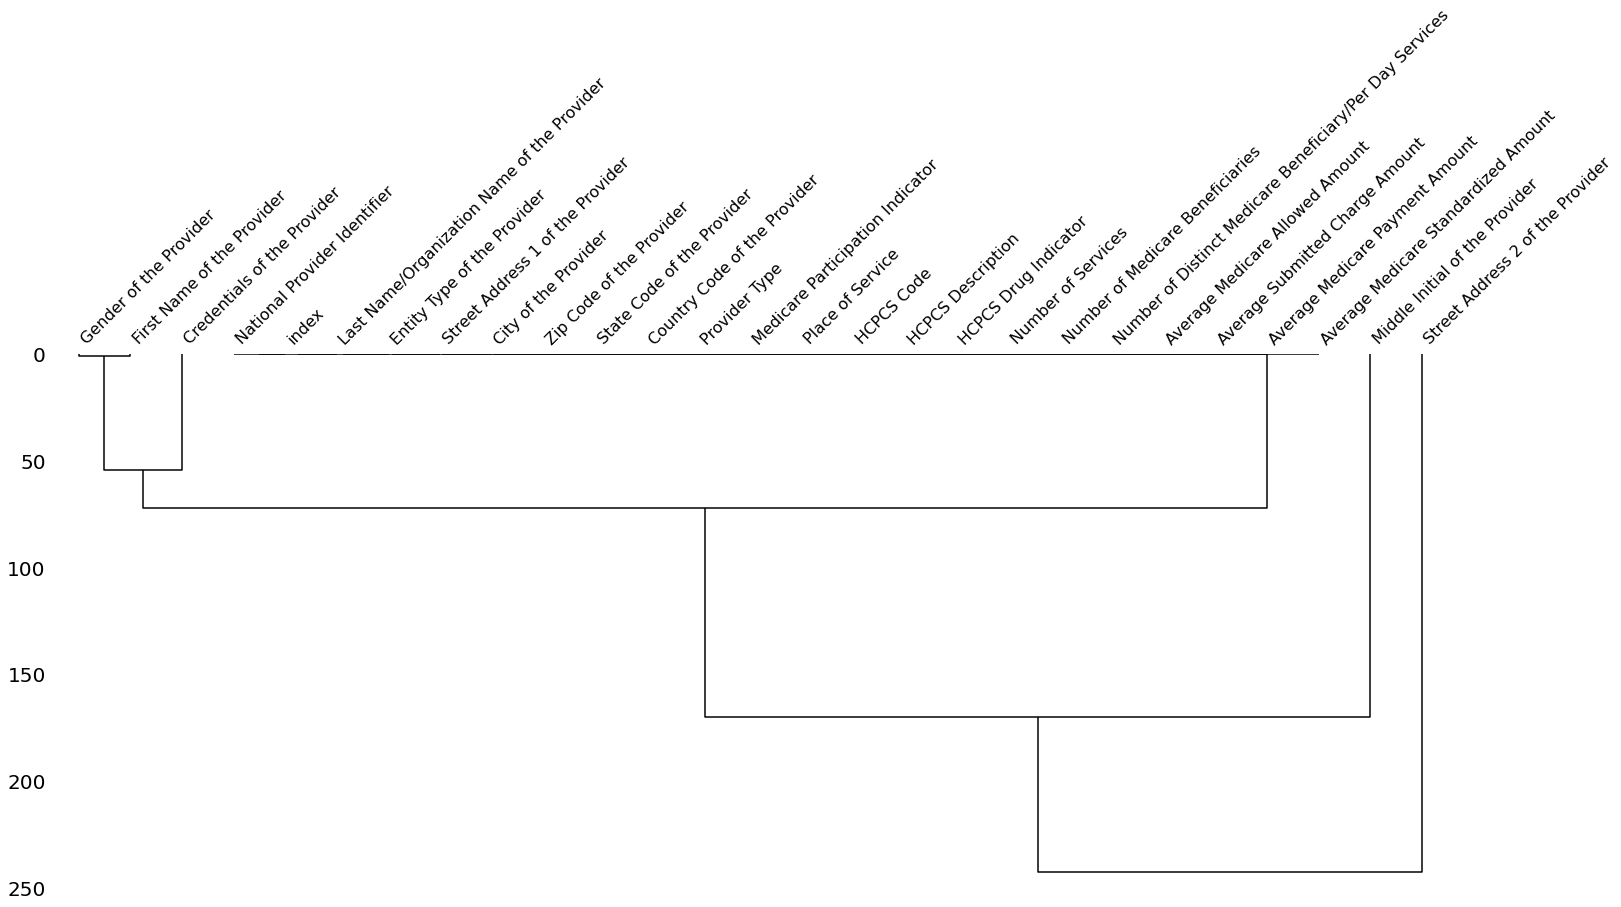

In [ ]:
msngo.dendrogram(df)

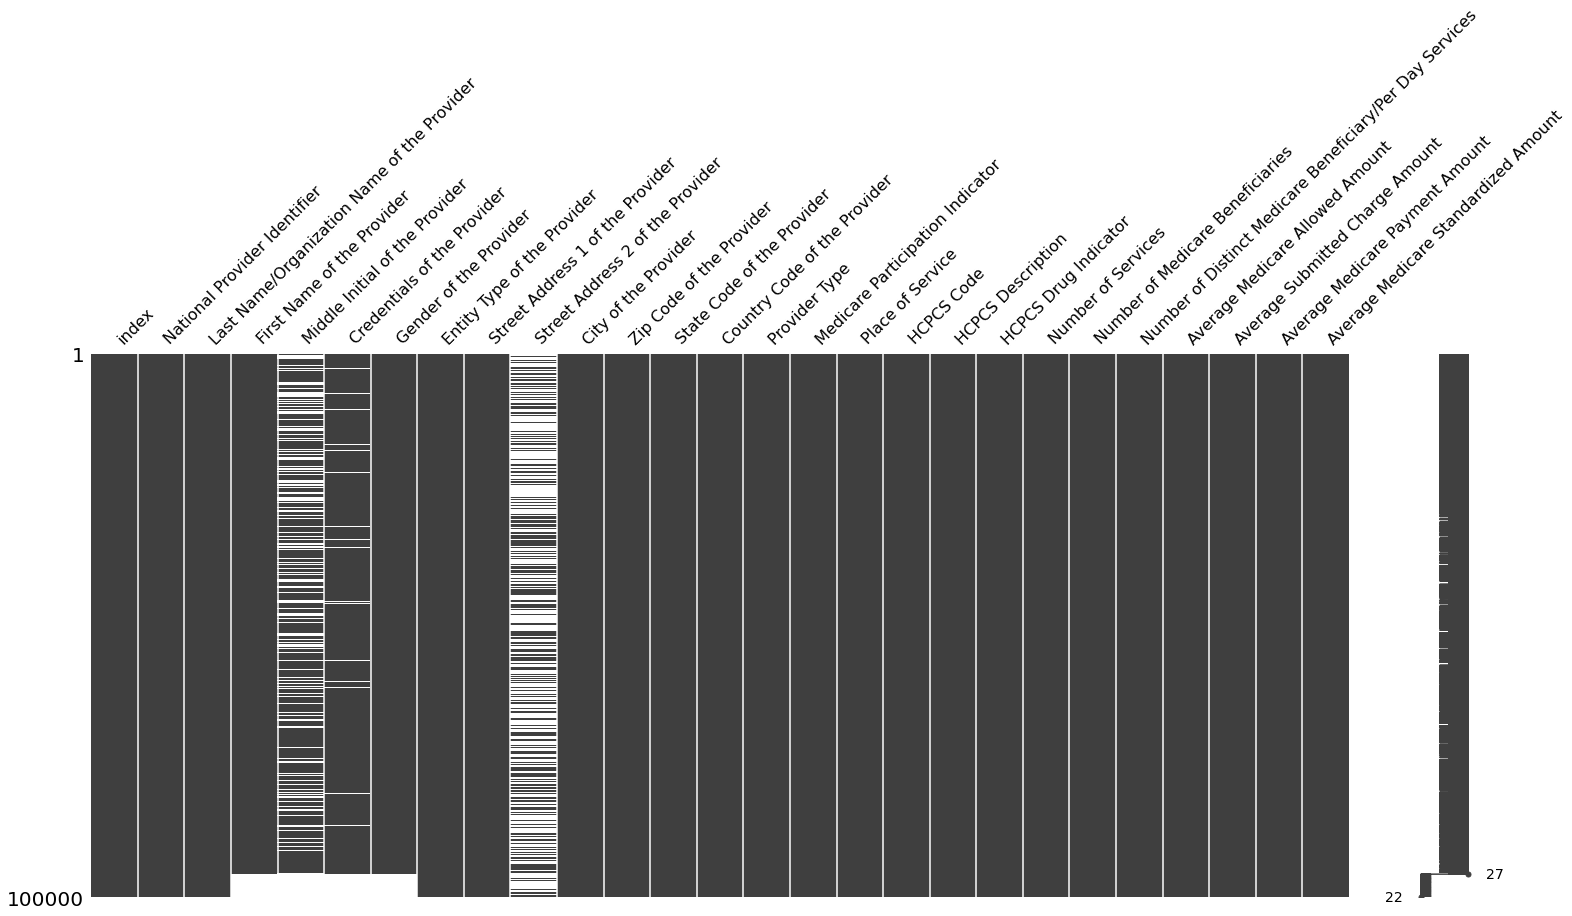

In [ ]:
msngo.matrix(df.sort_values('Gender of the Provider'))

Write the reasons for the missing values

1. It makes sense that for those that the credentials are missing also dont have information about names
2. A chunk of the dataset are missing values for gender, names, etc.. This could happen if the participants did not allow their identifiying information to be used in the dataset.
3. Street address 2 is missing because not everyone has 2 homes, same with middle initial.

## <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [ ]:
df_train = df[['Number of Services', 'Average Medicare Allowed Amount','Gender of the Provider']]
df_train = df_train.dropna()

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(
    df_train[['Number of Services', 'Average Medicare Allowed Amount']],
    df_train['Gender of the Provider']
)

LogisticRegression()

In [ ]:
df_test = df[['Number of Services', 'Average Medicare Allowed Amount']]
df['Gender of the Provider'] = log_reg.predict(df_test)

# <font color = 'Orange'> Encode non numerical values </font> 

If this is still not passed on the classes just erase these columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    100000 non-null  object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [ ]:
df_copy = df.copy()
for column in df_copy:
  if df_copy[column].dtype == 'object':
    enc = LabelEncoder()
    df_copy[column] = enc.fit_transform(df_copy[column])

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  int64  
 3   First Name of the Provider                                100000 non-null  int64  
 4   Middle Initial of the Provider                            100000 non-null  int64  
 5   Credentials of the Provider                               100000 non-null  int64  
 6   Gender of the Provider                                    100000 non-null  int64  
 7   Entity Type of the Provider                               100000 non-null  int64  
 8   Stree

# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [ ]:
df_copy.to_csv('/content/drive/MyDrive/final_lab2.csv')

Print the first rows of your final Dataset

In [ ]:
df_copy.head()

index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

   Last Name/Organization Name of the Provider  First Name of the Provider  \
0                                        39468                       10215   
1                                        18353                       12477   
2                                        10622                        9592   
3                                        12995                        5036   
4                                        29475                         773   

   Middle Initial of the Provider  Credentials of the Provider  \
0                              29                          667   
1                              18                          667   
2                              25                          438   
3                              29                          956   
4                               7                          410   

   Gender of the Provider  Entity Type of the Provider  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            0   

   Street Address 1 of the Provider  Street Address 2 of the Provider  ...  \
0                              9763                              3452  ...   
1                             25436                             10024  ...   
2                             16839                              6156  ...   
3                             39461                             10024  ...   
4                             48417                              7639  ...   

   HCPCS Code  HCPCS Description  HCPCS Drug Indicator  Number of Services  \
0        2251                967                     0                27.0   
1        2374               2054                     0               175.0   
2        2295                665                     0                32.0   
3        1329               2330                     0                20.0   
4        2163                973                     0                33.0   

   Number of Medicare Beneficiaries  \
0                              24.0   
1                             175.0   
2                              13.0   
3                              18.0   
4                              24.0   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                               27.0          
1                                              175.0          
2                                               32.0          
3                                               20.0          
4                                               31.0          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                       200.587778                       305.211111   
1                       123.730000                       548.800000   
2                        90.650000                       155.000000   
3                         3.500000                         5.000000   
4                        26.520000                        40.000000   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  
0                       157.262222                            160.908889  
1                       118.830000                            135.315257  
2                        64.439688                             60.595937  
3                         3.430000                              3.430000  
4                        19.539394                             19.057576  

[5 rows x 27 columns]

#<font color='orange'>EDA</font>

## <font color='Orange'>Find statistic elements for the continuous variables</font>
Like mean, median,  standard deviation, minimum, maximum, quantile,geometric mean

In [ ]:
stats = []
for column in df:
  if df[column].dtype != 'object':
    stats.append(df[column].describe())
pd.DataFrame(stats)

count          mean  \
index                                               100000.0  4.907646e+06   
National Provider Identifier                        100000.0  1.498227e+09   
Zip Code of the Provider                            100000.0  4.163820e+08   
Number of Services                                  100000.0  2.396714e+02   
Number of Medicare Beneficiaries                    100000.0  8.980931e+01   
Number of Distinct Medicare Beneficiary/Per Day...  100000.0  1.421157e+02   
Average Medicare Allowed Amount                     100000.0  1.014342e+02   
Average Submitted Charge Amount                     100000.0  3.545505e+02   
Average Medicare Payment Amount                     100000.0  7.735880e+01   
Average Medicare Standardized Amount                100000.0  7.803069e+01   

                                                             std  \
index                                               2.839633e+06   
National Provider Identifier                        2.874125e+08   
Zip Code of the Provider                            3.082566e+08   
Number of Services                                  2.493187e+03   
Number of Medicare Beneficiaries                    1.109617e+03   
Number of Distinct Medicare Beneficiary/Per Day...  1.640227e+03   
Average Medicare Allowed Amount                     2.572428e+02   
Average Submitted Charge Amount                     1.062608e+03   
Average Medicare Payment Amount                     1.997188e+02   
Average Medicare Standardized Amount                2.000455e+02   

                                                             min  \
index                                               2.090000e+02   
National Provider Identifier                        1.003001e+09   
Zip Code of the Provider                            6.010000e+02   
Number of Services                                  1.100000e+01   
Number of Medicare Beneficiaries                    1.100000e+01   
Number of Distinct Medicare Beneficiary/Per Day...  1.100000e+01   
Average Medicare Allowed Amount                     1.000000e-02   
Average Submitted Charge Amount                     1.000000e-02   
Average Medicare Payment Amount                     8.679245e-03   
Average Medicare Standardized Amount                8.679245e-03   

                                                             25%  \
index                                               2.458791e+06   
National Provider Identifier                        1.245669e+09   
Zip Code of the Provider                            1.426300e+08   
Number of Services                                  2.100000e+01   
Number of Medicare Beneficiaries                    1.700000e+01   
Number of Distinct Medicare Beneficiary/Per Day...  2.000000e+01   
Average Medicare Allowed Amount                     2.427000e+01   
Average Submitted Charge Amount                     5.764788e+01   
Average Medicare Payment Amount                     1.933523e+01   
Average Medicare Standardized Amount                2.012185e+01   

                                                             50%  \
index                                               4.901266e+06   
National Provider Identifier                        1.497847e+09   
Zip Code of the Provider                            3.633025e+08   
Number of Services                                  4.300000e+01   
Number of Medicare Beneficiaries                    3.200000e+01   
Number of Distinct Medicare Beneficiary/Per Day...  4.000000e+01   
Average Medicare Allowed Amount                     6.509500e+01   
Average Submitted Charge Amount                     1.460000e+02   
Average Medicare Payment Amount                     4.702018e+01   
Average Medicare Standardized Amount                4.784109e+01   

                                                             75%           max  
index                                               7.349450e+06  9.847440e+06  
National Provider Identifier          

## <font color = 'Orange'>Find the frequencies for the categorical variables </font>

In [ ]:
stats = []
for column in df:
  if df[column].dtype == 'object':
    stats.append(df[column].describe())
pd.DataFrame(stats)

count  unique  \
Last Name/Organization Name of the Provider  100000   42820   
First Name of the Provider                    95745   13022   
Middle Initial of the Provider                70669      29   
Credentials of the Provider                   92791    1854   
Gender of the Provider                       100000       1   
Entity Type of the Provider                  100000       2   
Street Address 1 of the Provider             100000   51928   
Street Address 2 of the Provider              40637   10024   
City of the Provider                         100000    5846   
State Code of the Provider                   100000      58   
Country Code of the Provider                 100000       4   
Provider Type                                100000      90   
Medicare Participation Indicator             100000       2   
Place of Service                             100000       2   
HCPCS Code                                   100000    2631   
HCPCS Description                            100000    2455   
HCPCS Drug Indicator                         100000       2   

                                                                                           top  \
Last Name/Organization Name of the Provider                                              PATEL   
First Name of the Provider                                                             MICHAEL   
Middle Initial of the Provider                                                               A   
Credentials of the Provider                                                                 MD   
Gender of the Provider                                                                       M   
Entity Type of the Provider                                                                  I   
Street Address 1 of the Provider                                                 200 1ST ST SW   
Street Address 2 of the Provider                                                     SUITE 200   
City of the Provider                                                                  NEW YORK   
State Code of the Provider                                                                  CA   
Country Code of the Provider                                                                US   
Provider Type                                                             Diagnostic Radiology   
Medicare Participation Indicator                                                             Y   
Place of Service                                                                             O   
HCPCS Code                                                                               99213   
HCPCS Description                            Established patient office or other outpatient...   
HCPCS Drug Indicator                                                                         N   

                                               freq  
Last Name/Organization Name of the Provider     557  
First Name of the Provider                     2350  
Middle Initial of the Provider                 8152  
Credentials of the Provider                   32874  
Gender of the Provider                       100000  
Entity Type of the Provider                   95746  
Street Address 1 of the Provider                244  
Street Address 2 of the Provider               1624  
City of the Provider                           1061  
State Code of the Provider                     7775  
Country Code of the Provider                  99994  
Provider Type                                 12537  
Medicare Participation Indicator              99969  
Place of Service                              61616  
HCPCS Code                                     4578  
HCPCS Description                              4578  
HCPCS Drug Indicator                          93802

# <font color = 'Orange'>Data visualization </font>

## <font color = 'Orange'>Find the distribution of given attributes</font>


Which of the attributes(columns) did you choose?


Answer: State Code of the Provider. payment ammount and number of services

**Make the visualizations using histograms, bar charts, etc.**

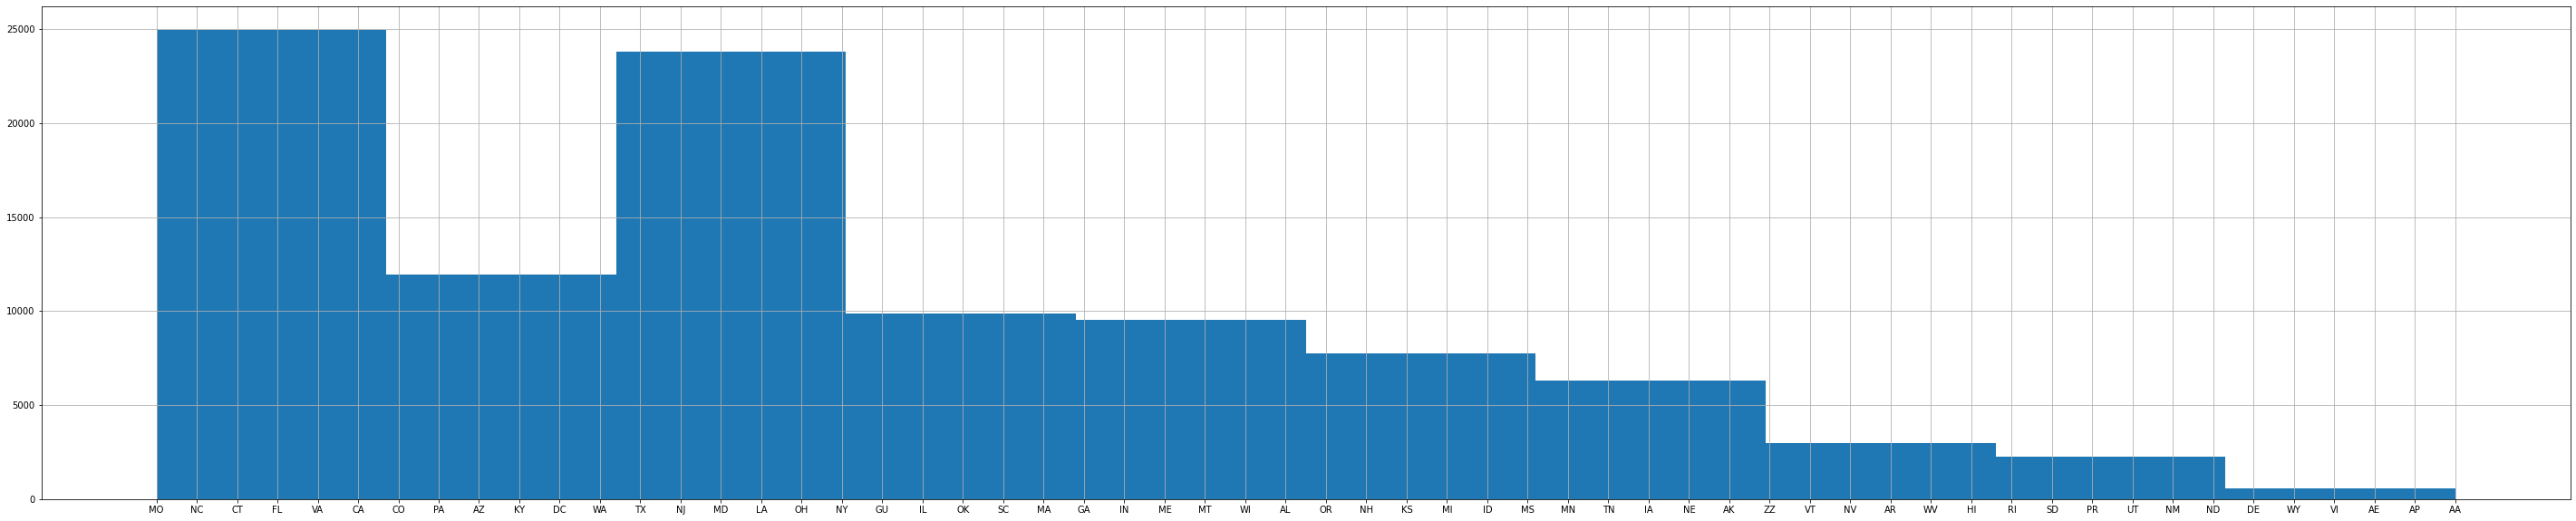

In [ ]:
df['State Code of the Provider'].hist(figsize=(50,10))

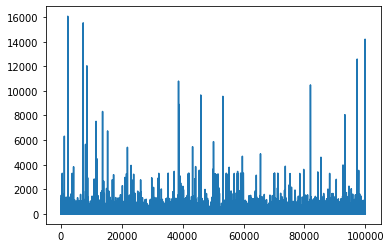

In [ ]:
df['Average Medicare Payment Amount'].plot()

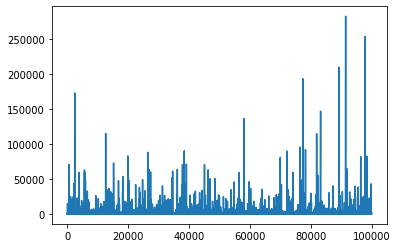

In [ ]:
df['Number of Services'].plot()


Add as many codeboxes as you need

## <font color = 'Orange'>Visualize the relationship between the attributes</font>

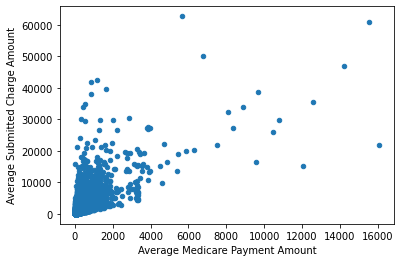

In [ ]:
df.plot.scatter(x='Average Medicare Payment Amount', y='Average Submitted Charge Amount')

## <font color = 'Orange'>Make comparison of the columns</font>

Using multiple histograms, box-plots, scatter plots, pairplots, etc.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb47bda3d0>,
      dtype=object)

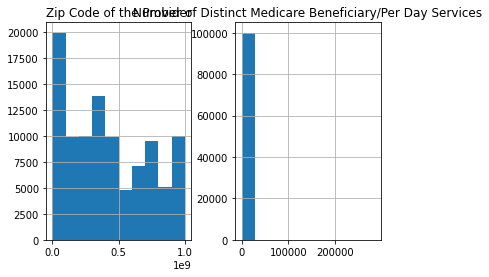

In [ ]:
df[['Zip Code of the Provider','Number of Distinct Medicare Beneficiary/Per Day Services']].hist()

# <font color = 'Orange'>EXTRA: Complex visualizations</font> 
For this you will need a basic knowladge of the Plotly library: https://plotly.com/graphing-libraries/
and for deploying the visualization as a web app you will need the Dash library for that take a look of: https://github.com/plotly/dash



In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.scatter(df,  y="Number of Distinct Medicare Beneficiary/Per Day Services")

buttonlist = []
for col in df.columns[-3:]:
  buttonlist.append(
    dict(args=['y',[df[str(col)]] ], label=str(col), method='restyle')
  )

fig.update_layout(
        title="Data",
        updatemenus=[
            go.layout.Updatemenu(
                buttons=buttonlist,
            ),
        ],
        autosize=True
)


fig.show()